In [444]:
import math

In [445]:
a, b = 4, 2                         
attraction_point = [0.0, 0.0]       
attraction_radius = 0.5               
g = 20      
p1 = [0.5, -1.5]
initial_angle = 2 * math.pi / 3
v1 = [math.cos(initial_angle), math.sin(initial_angle)]             

In [446]:
m,n = attraction_point[0], attraction_point[1]

In [447]:
x,y = p1[0], p1[1]

In [448]:
mag = 1/ ((m-x) ** 2 + (n-y) ** 2)

In [449]:
v1

[-0.49999999999999983, 0.8660254037844387]

In [450]:
def newP(v,att,t,o):
    p2 = v + v1[o] * t + 1/2 * (att-v) * g * (t ** 2) * mag
    return p2

In [451]:
def ABCDE(att, pos, velo):
    A,B,C,D,E = 0,0,0,0,0
    
    A = 1/4 * (att - pos) ** 2 * g ** 2 * mag ** 2
    B = (att - pos) * g * mag * velo
    C = velo ** 2 + pos * g * mag
    D = 2 * pos * velo
    E = pos ** 2
    
    return A,B,C,D,E

In [452]:
def ABCDE(att, pos, velo):
    # compute the scalar acceleration toward the attractor
    a = (att - pos) * g * mag

    # coefficients of t^4, t^3, t^2, t^1 and constant term
    A = 0.25 * a**2          # (½ a)^2
    B = a * velo             # 2*(½ a)*(v)
    C = velo**2 + pos * a    # v^2 + 2*(½ a)*pos
    D = 2 * pos * velo       # 2*p*v
    E = pos**2               # p^2

    return A, B, C, D, E


In [453]:
A,B,C,D,E = ABCDE(0, x, v1[0])
xl = [A,B,C,D,E]

In [454]:
xl

[4.0, 1.9999999999999993, -1.7500000000000002, -0.49999999999999983, 0.25]

In [455]:
A,B,C,D,E = ABCDE(0, y, v1[1])
yl = [A,B,C,D,E]

In [456]:
yl

[36.0, 10.392304845413264, -17.25, -2.598076211353316, 2.25]

In [457]:
co = []

In [458]:
for i in range(len(xl)):
    co.append(xl[i]+yl[i])

In [459]:
co

[40.0, 12.392304845413264, -19.0, -3.098076211353316, 2.5]

In [460]:
co[-1] -= 4

In [461]:
co

[40.0, 12.392304845413264, -19.0, -3.098076211353316, -1.5]

In [462]:
import numpy as np

ts = np.roots(co)
posT = [t.real for t in ts if np.isreal(t)]

In [463]:
ts

array([-0.83317788+0.j        ,  0.6785205 +0.j        ,
       -0.07757512+0.24559162j, -0.07757512-0.24559162j])

In [464]:
posT

[-0.8331778816393556, 0.678520497748649]

In [465]:
for i in range(len(xl)):
    print(4-i)

4
3
2
1
0


In [466]:
for time in posT:
    xpos = 0
    ypos = 0
    for i in range(len(xl)):
        xpos += xl[i] * time ** (4-i)
        ypos += yl[i] * time ** (4-i)
    print(xpos + ypos)
    

4.000000000000011
3.999999999999996


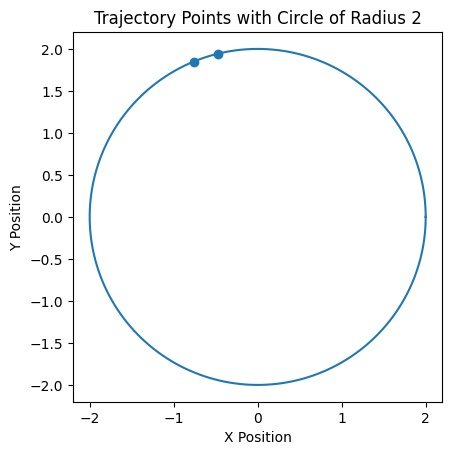

In [467]:
px = [newP(x,  0, T, 0) for T in posT]
py = [newP(y,  0, T, 1) for T in posT]

plt.figure()
plt.scatter(px, py)

theta = np.linspace(0, 2*np.pi, 200)
plt.plot(2*np.cos(theta), 2*np.sin(theta))  

plt.gca().set_aspect('equal', 'box')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectory Points with Circle of Radius 2')

plt.show()

In [468]:
px,py

([-0.47178182408641045, -0.7600403806044732],
 [1.9435590833472784, 1.8499563832292383])

In [469]:
tpos = []
ypos = []

In [470]:
# pos = []
# for T in range(10000):
#     T *= 0.0001
#     pos.append([newP(x,0, T, 0), newP(y,0,T, 1)])
#     tpos.append([T, newP(x,0, T, 0)])
#     ypos.append([T, newP(y,0, T, 1)])

In [471]:
pos = []
pos.append([newP(x,0, posT[0], 0), newP(y,0,posT[0], 1)])
for T in range(10000):
    T *= 0.0001
    T += posT[0]
    if T >= posT[1]:
        break
    pos.append([newP(x,0, T, 0), newP(y,0,T, 1)])
    tpos.append([T, newP(x,0, T, 0)])
    ypos.append([T, newP(y,0, T, 1)])

In [472]:
[newP(x,0, posT[0], 0), newP(y,0,posT[0], 1)]


[-0.47178182408641045, 1.9435590833472784]

In [473]:
pos[-1]

[0.3610464113183563, -1.1888368216229614]

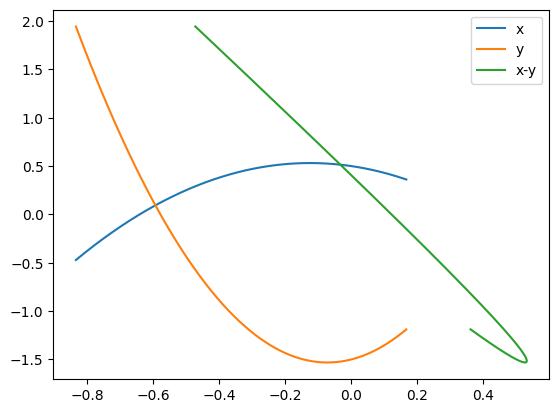

In [474]:
import matplotlib.pyplot as plt
x3, y3 = zip(*pos)
x1, y1 = zip(*tpos)
x2,y2 = zip(*ypos)

# Plot the data from both lists on the same graph.
plt.plot(x1, y1, marker='o', markersize=0.001, linestyle='-', label='x')
plt.plot(x2, y2, marker='o', markersize=0.001, linestyle='-', label='y')
plt.plot(x3, y3, marker='o', markersize=0.001, linestyle='-', label='x-y')

plt.legend()

plt.show()


/var/folders/xx/m4kxh2sd2c1c63v6bkc7c48h0000gn/T/ipykernel_3106/3445104073.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/xx/m4kxh2sd2c1c63v6bkc7c48h0000gn/T/ipykernel_3106/3445104073.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()
/var/folders/xx/m4kxh2sd2c1c63v6bkc7c48h0000gn/T/ipykernel_3106/3445104073.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()


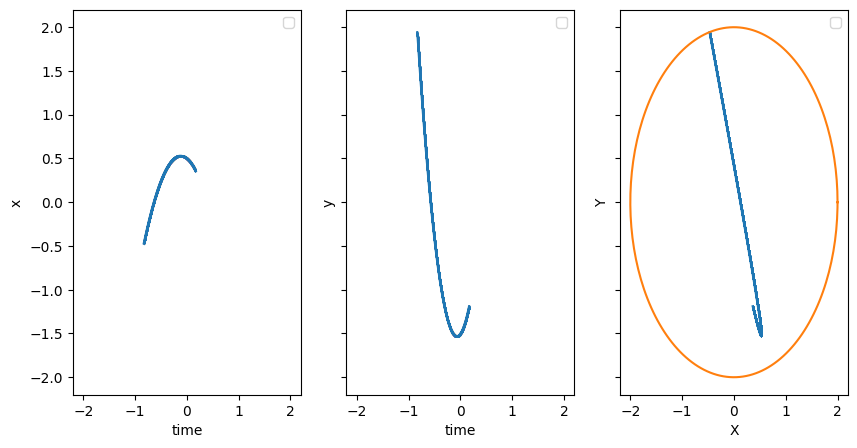

In [475]:
import matplotlib.pyplot as plt


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 5))

ax1.plot(x1, y1, marker='o', linestyle='-', markersize=0.1)
ax1.set_xlabel("time")
ax1.set_ylabel("x")
ax1.legend()

ax2.plot(x2, y2, marker='o', linestyle='-', markersize=0.1)
ax2.set_xlabel("time")
ax2.set_ylabel("y")
ax2.legend()

ax3.plot(x3, y3, marker='s', linestyle='-', markersize=0.2)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
theta = np.linspace(0, 2*np.pi, 200)
ax3.plot(2*np.cos(theta), 2*np.sin(theta))  
ax3.legend()


plt.show()
